<a href="https://colab.research.google.com/github/RyanKelvinFord/Aalto-MBA-2025-Economics/blob/main/WEO_Data_MUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def save_plot(title, fig=None, dpi=300):
    """
    Saves a plot to Google Drive under /MBA with a clean filename.
    """
    filename = title.strip().replace(":", "")\
                            .replace("(", "")\
                            .replace(")", "")\
                            .replace("%", "percent")\
                            .replace("–", "-")\
                            .replace("—", "-")\
                            .replace(" ", "_") + ".png"

    filepath = "/content/drive/MyDrive/MBA/" +  filename

    if fig:
        fig.savefig(filepath, bbox_inches='tight', dpi=dpi)
    else:
        plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

    print(f"Saved: {filepath}")

In [5]:
# https://www.imf.org/en/Publications/WEO/weo-database/2024/April/select-subjects?c=684,
file_path = '/content/drive/MyDrive/MBA/WEO_Data_MUR.xlsx'

In [6]:
xls = pd.ExcelFile(file_path, engine='openpyxl')
print("Sheet Names:", xls.sheet_names)

df = xls.parse('Sheet 1 - WEO_Data', header=1)

print("\nShape of the DataFrame:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

print("\nUnique Countries:", df['Country'].unique())
print("\nUnique Indicators:\n", df['Subject Descriptor'].unique())

Sheet Names: ['Sheet 1 - WEO_Data']

Shape of the DataFrame: (42, 36)

Column Names:
 ['Country', 'Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 'Estimates Start After']

Unique Countries: ['Mauritius' nan
 'International Monetary Fund, World Economic Outlook Database, April 2024']

Unique Indicators:
 ['Gross domestic product, constant prices'
 'Gross domestic product, current prices'
 'Gross domestic product, deflator'
 'Gross domestic product per capita, constant prices'
 'Gross domestic product per capita, current prices'
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total'
 'Implied PPP conversion rate' 'Total investment' 'Gross national savings'
 'Inflation, average consumer prices'
 'Inflation, end of period consumer prices'
 'Volume of imports

In [7]:
display(df.head())

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1995,1996,1997,1998,1999,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Estimates Start After
0,Mauritius,"Gross domestic product, constant prices",National currency,Billions,Source: National Statistics Office Latest actu...,191.406,202.101,213.596,226.565,232.480,...,462.567,480.783,500.047,514.505,439.662,454.627,495.001,529.007,554.723,2023.0
1,Mauritius,"Gross domestic product, constant prices",Percent change,Units,"See notes for: Gross domestic product, consta...",4.288,5.588,5.687,6.072,2.611,...,3.862,3.938,4.007,2.891,-14.547,3.404,8.881,6.870,4.861,2023.0
2,Mauritius,"Gross domestic product, current prices",National currency,Billions,Source: National Statistics Office Latest actu...,77.179,82.374,90.759,104.453,115.769,...,447.620,472.861,500.047,512.108,448.874,478.807,572.111,650.546,721.386,2023.0
3,Mauritius,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",4.439,4.590,4.310,4.354,4.597,...,12.594,13.714,14.736,14.436,11.408,11.484,12.949,14.371,16.359,2023.0
4,Mauritius,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",7.655,8.231,8.849,9.492,9.878,...,26.929,28.009,29.799,31.175,26.992,29.191,34.021,37.683,40.468,2023.0


In [8]:
df.columns = df.columns.map(str)

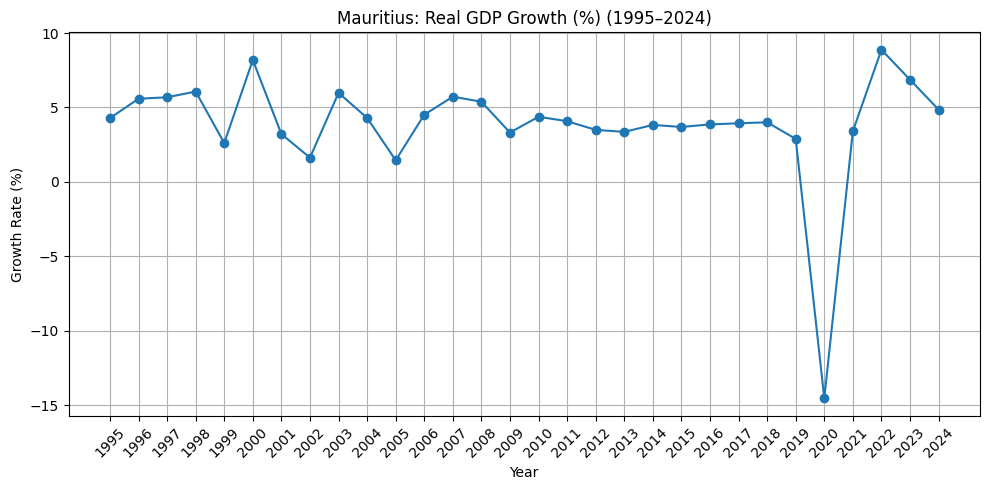

Saved: /content/drive/MyDrive/MBA/Mauritius_Real_GDP_Growth_percent_1995-2024.png


In [9]:
# Extract Real GDP Growth (%)
gdp_row = df[
    (df['Subject Descriptor'] == 'Gross domestic product, constant prices') &
    (df['Units'] == 'Percent change')
]

years = [str(year) for year in range(1995, 2025)]
gdp_values = gdp_row[years].values.flatten().astype(float)

fig = plt.figure(figsize=(10, 5))
plt.plot(years, gdp_values, marker='o')
plt.title('Mauritius: Real GDP Growth (%) (1995–2024)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Real GDP Growth (%) (1995–2024)",
    fig
)

Mauritius: Real GDP Growth (1995–2024)

This chart presents the annual real GDP growth rate of Mauritius from 1995 to 2024, illustrating the country’s economic performance over three decades. Overall, Mauritius maintained relatively steady growth in the 4–6% range throughout the late 1990s and early 2000s, driven by sectors such as tourism, textiles, and financial services.

In 2008–2009, a slight dip is observed during the global financial crisis, though Mauritius demonstrated resilience compared to many other economies. Growth resumed quickly afterward.

The most dramatic shock appears in 2020, where the economy contracted by over -14%, reflecting the impact of the COVID-19 pandemic — particularly severe for a tourism-dependent island nation. This is the lowest point in the entire series.

However, the recovery has been notable: in 2021, growth rebounded to around 9%, followed by continued strong performance in 2022 and 2023, before normalizing in 2024. This V-shaped recovery highlights the government’s fiscal and monetary interventions, along with the reopening of the global economy.

Summary Insight:

Mauritius has demonstrated strong long-term economic resilience with steady pre-COVID growth, a sharp pandemic shock, and a robust post-COVID recovery. The challenge going forward is to sustain this rebound while addressing structural issues like export diversification and innovation.

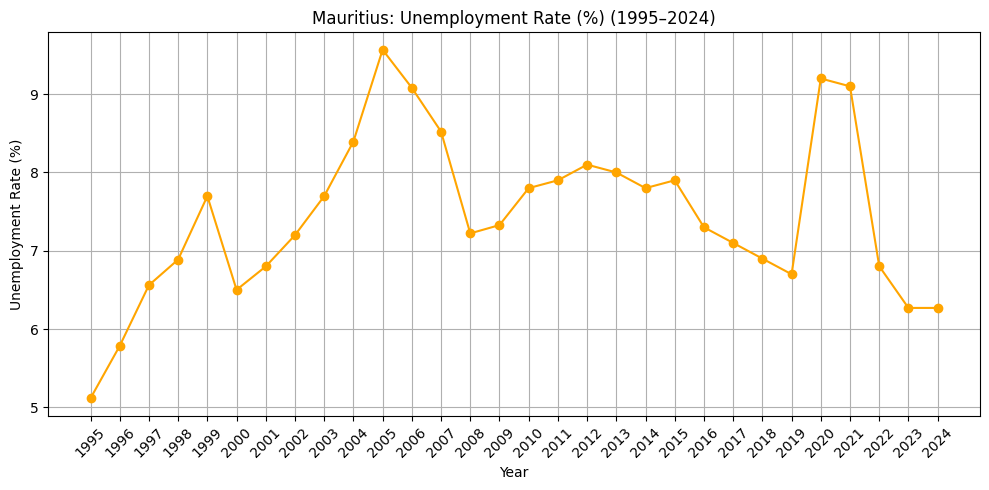

Saved: /content/drive/MyDrive/MBA/Mauritius_Unemployment_Rate_percent_1995-2024.png


In [10]:
# Extract Unemployment Rate
unemp_row = df[
    (df['Subject Descriptor'] == 'Unemployment rate') &
    (df['Units'] == 'Percent of total labor force')
]

unemp_values = unemp_row[years].values.flatten().astype(float)

fig = plt.figure(figsize=(10, 5))
plt.plot(years, unemp_values, marker='o', color='orange')
plt.title('Mauritius: Unemployment Rate (%) (1995–2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Unemployment Rate (%) (1995–2024)",
    fig
)

Mauritius: Unemployment Rate (1995–2024)

This chart tracks the annual unemployment rate in Mauritius over the period 1995 to 2024. The data reveals several key phases in the country’s labor market dynamics:

Rising Trend (1995–2005):
Unemployment steadily increased from just over 5% in 1995 to a peak of 9.6% in 2005, reflecting structural challenges in job creation, particularly in the wake of globalization pressures on the textile and sugar industries — two of Mauritius’s main employers during that period.

Gradual Improvement (2006–2019):
From 2006 onward, Mauritius made progress in reducing unemployment, thanks in part to the expansion of the services sector (finance, ICT, tourism) and better labor policies. The rate gradually fell to around 6.7% by 2019, just before the pandemic.

Pandemic Spike (2020–2021):
A sharp increase occurred in 2020, with unemployment jumping to 9.2%, primarily due to the collapse of tourism and related services amid global COVID-19 lockdowns. This was one of the highest spikes since 2005.

Post-Pandemic Recovery (2022–2024):
Following the reopening of borders and revival of key sectors, unemployment dropped significantly to around 6.3%, returning close to pre-pandemic levels by 2023–2024.

Key Takeaways:

Mauritius’s labor market shows a long-term trend of resilience and gradual structural improvement. The economy has become more service-oriented, helping reduce unemployment. While the pandemic temporarily reversed gains, recovery was swift. Nonetheless, youth and female unemployment, though not visible here, remain areas needing targeted policy interventions.


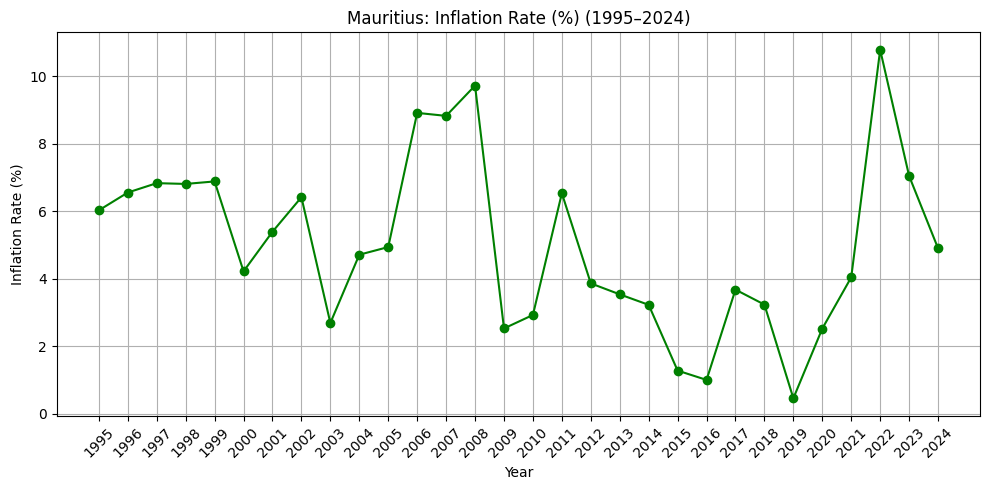

Saved: /content/drive/MyDrive/MBA/Mauritius_Inflation_Rate_percent_1995-2024.png


In [11]:
# Extract Inflation Rate
infl_row = df[
    (df['Subject Descriptor'] == 'Inflation, average consumer prices') &
    (df['Units'] == 'Percent change')
]

infl_values = infl_row[years].values.flatten().astype(float)

fig = plt.figure(figsize=(10, 5))
plt.plot(years, infl_values, marker='o', color='green')
plt.title('Mauritius: Inflation Rate (%) (1995–2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Inflation Rate (%) (1995–2024)",
    fig
)

Mauritius: Inflation Rate (%) (1995–2024)

This chart illustrates the average annual inflation rate in Mauritius over the period from 1995 to 2024, highlighting the volatility and policy challenges associated with price stability in a small, open island economy.

Key Phases:

1995–2008: Moderate & Volatile Inflation (~6–10%)
During this period, inflation hovered in the 6–7% range, with notable spikes in 2007–2008 when inflation approached 9.7%, largely driven by rising global fuel and food prices. The economy, while growing, was vulnerable to international commodity shocks.

2009–2019: Period of Disinflation and Stability
After the global financial crisis, inflation fell sharply to 2.6% in 2009 and remained generally low, averaging around 3–4%, with some years (like 2015–2016) dipping below 2%. This reflects tighter monetary policy, more stable exchange rates, and falling global commodity prices.

2020–2022: Pandemic-Driven Surge
Inflation began to rise again after 2020, in line with global trends, peaking at 10.7% in 2022 — the highest rate in the dataset. Contributing factors included:
- COVID-era supply chain disruptions
- Rising fuel and import prices
- Currency depreciation
- 2023–2024: Gradual Decline

Inflation has started to ease, falling to around 4.9% in 2024, suggesting normalization in supply chains and easing external pressures.

Key Takeaways:

Mauritius has experienced both inflationary pressures and periods of stability, reflecting its exposure to global shocks and reliance on imports. The recent inflation spike (2022) was consistent with global post-COVID trends, but the current downward trajectory is encouraging. Maintaining low inflation will depend on exchange rate stability, food security, and external energy costs.

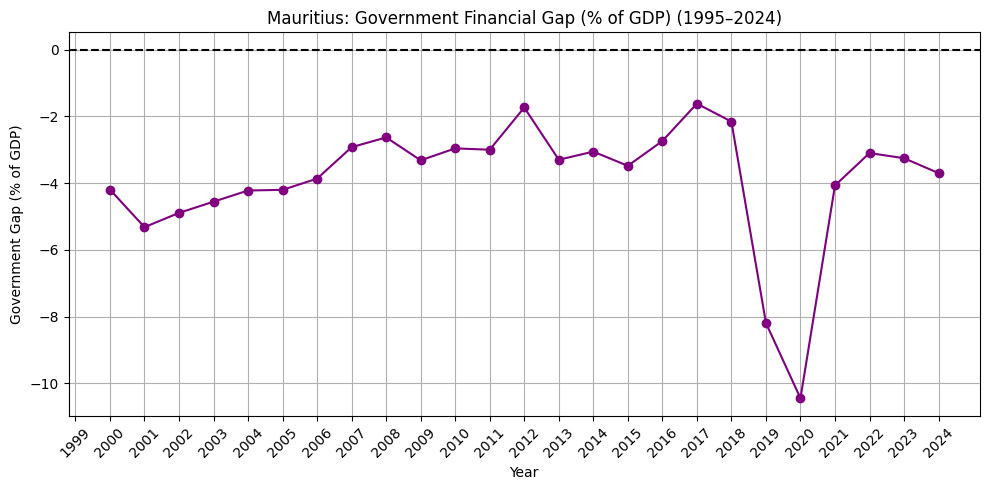

Saved: /content/drive/MyDrive/MBA/Mauritius_Government_Financial_Gap_percent_of_GDP_1995-2024.png


In [12]:
# A2a: Government Financial Gap (% of GDP)
gov_gap_row = df[
    (df['Subject Descriptor'] == 'General government net lending/borrowing') &
    (df['Units'] == 'Percent of GDP')
]

gov_gap_values = gov_gap_row[years].values.flatten().astype(float)

fig = plt.figure(figsize=(10, 5))
plt.plot(years, gov_gap_values, marker='o', color='purple')
plt.title('Mauritius: Government Financial Gap (% of GDP) (1995–2024)')
plt.xlabel('Year')
plt.ylabel('Government Gap (% of GDP)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Government Financial Gap (% of GDP) (1995–2024)",
    fig
)

Mauritius: Government Financial Gap (% of GDP) (1995–2024)

This chart represents Mauritius’s fiscal balance over time — the difference between government revenues and expenditures, expressed as a percentage of GDP. Negative values indicate fiscal deficits, while positive values would indicate surpluses (though Mauritius has never had a surplus in this dataset).


Key Observations:
- Consistent Deficits (2000–2019):
Throughout the early 2000s and 2010s, Mauritius maintained a modest but persistent fiscal deficit, averaging around -3% to -4% of GDP. This suggests a structural reliance on borrowing or deficit financing to support public spending, despite relatively stable macro conditions.
- Sharp Deterioration (2019–2020):
A dramatic fiscal shock occurred during the COVID-19 pandemic, when the deficit ballooned to over -10% of GDP in 2020. This was the result of:
- Emergency spending (healthcare, wage support)
- Plunging tourism revenue
- Decline in tax collection
- Post-Pandemic Consolidation (2021–2024):
The government made progress in narrowing the gap to around -3.5% by 2023–2024, showing efforts to restore fiscal discipline as the economy recovered. However, the deficit remains structurally negative.

Interpretation:

Mauritius has long relied on modest deficit spending to support development, but the pandemic-induced fiscal shock exposed the vulnerability of public finances. While the country has since reduced the deficit, fiscal sustainability remains a key policy challenge, particularly given the need for ongoing investment in healthcare, education, and infrastructure.

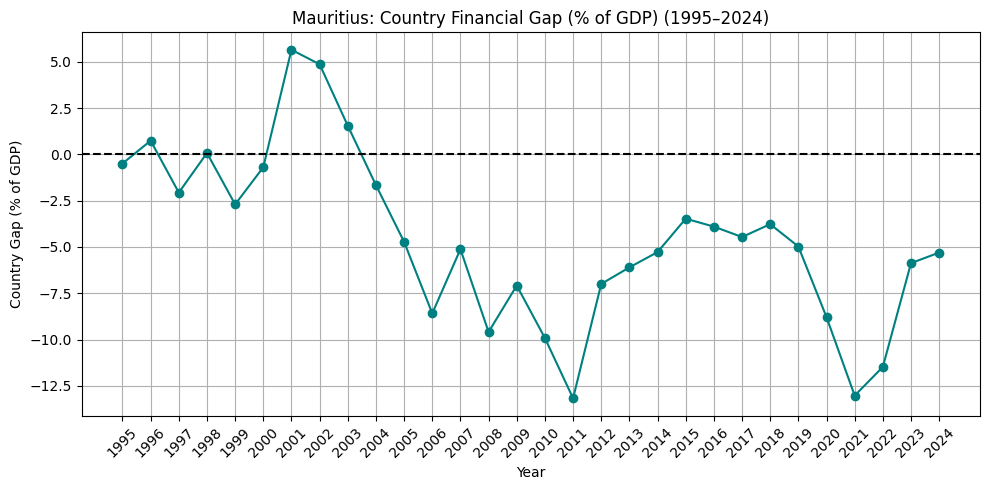

Saved: /content/drive/MyDrive/MBA/Mauritius_Country_Financial_Gap_percent_of_GDP_1995-2024.png


In [13]:
# A2c: Country Financial Gap (% of GDP)
country_gap_row = df[
    (df['Subject Descriptor'] == 'Current account balance') &
    (df['Units'] == 'Percent of GDP')
]

country_gap_values = country_gap_row[years].values.flatten().astype(float)

fig = plt.figure(figsize=(10, 5))
plt.plot(years, country_gap_values, marker='o', color='teal')
plt.title('Mauritius: Country Financial Gap (% of GDP) (1995–2024)')
plt.xlabel('Year')
plt.ylabel('Country Gap (% of GDP)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Country Financial Gap (% of GDP) (1995–2024)",
    fig
)

Mauritius: Country Financial Gap (% of GDP) (1995–2024)

The Country Financial Gap reflects the overall balance between a country’s savings and investment — including both public and private sectors. It provides insight into Mauritius’s external financing needs and potential vulnerabilities to capital flows or debt accumulation.


Observations:
- Fluctuating Surpluses and Deficits (1995–2004):
In the late 1990s, Mauritius hovered around a balanced or slightly positive financial gap, suggesting internal savings were generally sufficient to finance investment. However, this balance began to deteriorate after 2002, indicating rising investment or falling savings.
- Deepening Deficits (2005–2011):
The country experienced persistent and widening external financial deficits, reaching as much as -13% of GDP by 2011. This likely reflects high levels of investment relative to domestic saving, coupled with growing import dependence and trade imbalances.
- Partial Recovery (2012–2018):
From 2012 onward, the gap narrowed to around -3% to -5%, indicating improved external balances, possibly aided by stronger services exports (e.g., tourism, ICT) and remittances.
- Pandemic Collapse (2020–2021):
The financial gap sharply deteriorated again in 2020 and 2021, hitting -13% of GDP, driven by:
- Collapse in tourism (a major foreign exchange earner)
- High public spending and reduced revenues
- Increased borrowing from external sources
- Gradual Stabilization (2022–2024):
The gap narrows again in 2022–2024 to around -5%, showing signs of external rebalancing as the economy recovers.


Interpretation:

Mauritius exhibits long-term dependence on external financing, particularly during shocks such as the 2008 crisis and COVID-19. While the current account is stabilizing, structural reforms to increase domestic savings, diversify exports, and reduce reliance on foreign capital remain essential for sustainable development.


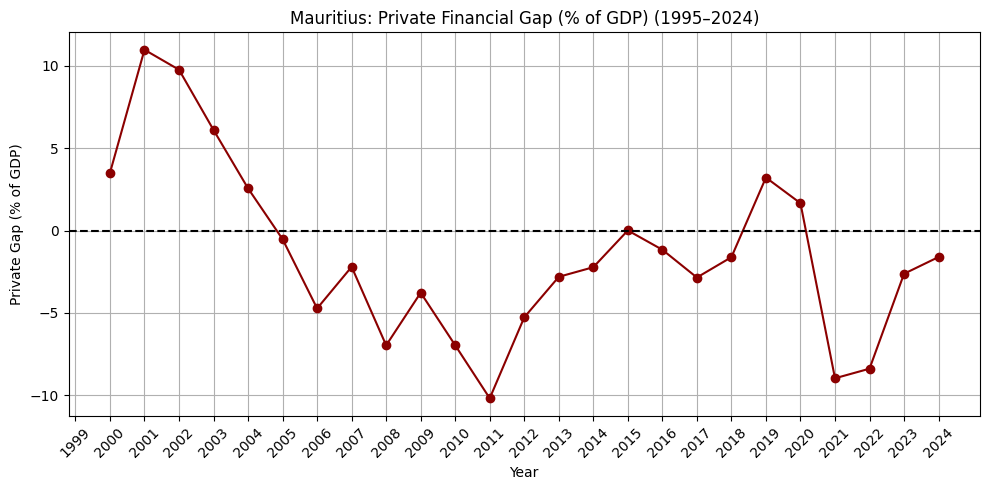

Saved: /content/drive/MyDrive/MBA/Mauritius_Private_Financial_Gap_percent_of_GDP_1995-2024.png


In [14]:
# A2b: Private Financial Gap = Country Gap – Government Gap
private_gap_values = country_gap_values - gov_gap_values

fig = plt.figure(figsize=(10, 5))
plt.plot(years, private_gap_values, marker='o', color='darkred')
plt.title('Mauritius: Private Financial Gap (% of GDP) (1995–2024)')
plt.xlabel('Year')
plt.ylabel('Private Gap (% of GDP)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Private Financial Gap (% of GDP) (1995–2024)",
    fig
)

Mauritius: Private Financial Gap (% of GDP) (1995–2024)

This chart measures the difference between private sector savings and investment, i.e. the private financial gap. A positive value means the private sector is saving more than it invests (a surplus), while a negative value indicates private sector dissaving or excessive investment financed through borrowing or external capital.

It is calculated as:

Private Financial Gap = Country Financial Gap – Government Financial Gap


Observations:
- Private Surplus (2000–2002):
In the early 2000s, Mauritius’s private sector ran a strong surplus of 10–11% of GDP, suggesting high domestic savings (from households or firms) relative to private investment.
- Rising Deficits (2003–2011):
A significant shift occurred after 2003, with the private gap turning negative — reaching -10% of GDP in 2011. This indicates that the private sector was investing aggressively (e.g., in real estate, tourism, and services), financed by foreign capital or domestic borrowing.
- Stabilization (2012–2018):
The private gap narrowed toward zero around 2015, indicating a better balance between savings and investment. This could reflect tighter credit conditions or reduced private investment demand.
- COVID-Era Contraction (2020–2021):
The private gap plunged again to -9.5% in 2021, as savings collapsed amid uncertainty, and private investment was supported by stimulus or borrowing. It reflects the private sector’s economic strain during the pandemic.
- Recovery (2022–2024):
The gap is recovering toward neutral by 2024, suggesting improving household and business confidence.

Interpretation:

Mauritius’s private sector has oscillated between strong saving and periods of aggressive investment. The private financial gap complements the government gap to explain the full country balance. The shift from large private surpluses in the early 2000s to deep deficits by the 2010s reflects changes in credit availability, foreign capital flows, and investment incentives.

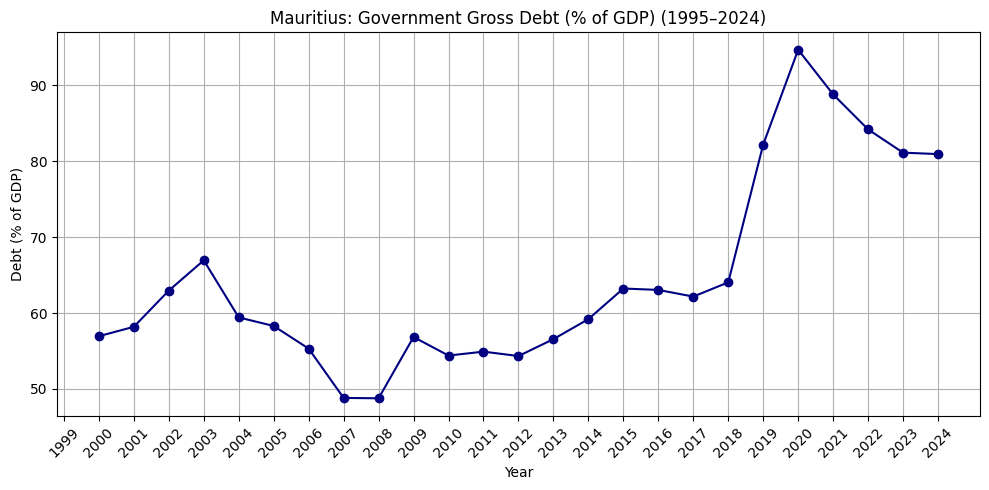

Saved: /content/drive/MyDrive/MBA/Mauritius_Government_Gross_Debt_percent_of_GDP_1995-2024.png


In [15]:
# A3a: General Government Gross Debt (% of GDP)
debt_row = df[
    (df['Subject Descriptor'] == 'General government gross debt') &
    (df['Units'] == 'Percent of GDP')
]

debt_values = debt_row[years].values.flatten().astype(float)

fig = plt.figure(figsize=(10, 5))
plt.plot(years, debt_values, marker='o', color='navy')
plt.title('Mauritius: Government Gross Debt (% of GDP) (1995–2024)')
plt.xlabel('Year')
plt.ylabel('Debt (% of GDP)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Government Gross Debt (% of GDP) (1995–2024)",
    fig
)


Mauritius: Government Gross Debt (% of GDP) (1995–2024)

This chart tracks the evolution of gross public debt as a percentage of GDP in Mauritius over nearly three decades. It offers critical insight into the sustainability of public finances and the country’s fiscal response to economic cycles and crises.


Key Trends:
- Early 2000s: High and Fluctuating Debt (~60–67%)
The public debt-to-GDP ratio remained relatively elevated and volatile during this period, reflecting legacy debt from earlier development efforts and fiscal imbalances. It peaked around 67% in 2003, before beginning a modest downward trend.
- Debt Reduction Phase (2004–2008):
Between 2004 and 2008, Mauritius saw a notable decline in debt to around 48% of GDP, thanks to stronger GDP growth, improved tax collection, and better fiscal discipline.
- Post-Crisis Stabilization (2009–2018):
The global financial crisis briefly pushed debt levels upward in 2009, but Mauritius managed to stabilize debt around 55–63% of GDP throughout the following decade, showing fiscal resilience and credible debt management.
- COVID-19 Shock (2019–2021):
The most dramatic spike occurs here: debt surged from ~64% in 2019 to over 94% in 2021, the highest on record. This sharp increase was due to:
- Emergency fiscal spending (health, social protection)
- Plummeting GDP from the collapse of tourism
- Increased external borrowing to cover revenue shortfalls
- Post-Pandemic Consolidation (2022–2024):
The debt ratio declined slightly, stabilizing around 81% by 2023–2024. This suggests a cautious return to fiscal consolidation as the economy recovers, though debt remains significantly above pre-COVID levels.

Interpretation:

Mauritius’s debt trajectory reflects prudent fiscal management until 2019, followed by necessary but steep COVID-era borrowing. The challenge going forward will be reducing debt while sustaining investment in key sectors like healthcare, education, and climate resilience — all without triggering austerity-led growth slowdowns.

In [16]:
#A3b. International Investment Position (IIP)

#The Net International Investment Position (IIP), which reflects the country’s net asset or liability position with the rest of the world, is not available for Mauritius in the IMF’s World Economic Outlook (WEO) database.

#As a result, the evolution of the country’s net foreign asset position (IIP as a percentage of GDP) could not be directly calculated in this report. This limitation is common among smaller or developing economies where such data is not consistently reported to international financial institutions.

#Nevertheless, the persistent current account deficits (A2c) over the past two decades suggest a gradual accumulation of external liabilities, implying a likely deterioration in Mauritius’s net foreign asset position.

In [17]:
# https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS?locations=MU
# https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?end=2023&locations=MU&start=1971

edu_file = '/content/drive/MyDrive/MBA/API_SE.XPD.TOTL.GD.xlsx'
health_file = '/content/drive/MyDrive/MBA/API_SH.XPD.CHEX.GD.xlsx'

# Load from "Data" sheet
edu_df = pd.read_excel(edu_file, sheet_name='Data', header=3)
health_df = pd.read_excel(health_file, sheet_name='Data', header=3)

# Filter for Mauritius
edu_mu = edu_df[edu_df['Country Name'] == 'Mauritius']
health_mu = health_df[health_df['Country Name'] == 'Mauritius']

# Year range
years = [str(y) for y in range(1995, 2025)]

# Extract year-wise values
edu_values = edu_mu[years].T.dropna().astype(float)
edu_values.index.name = 'Year'

health_values = health_mu[years].T.dropna().astype(float)
health_values.index.name = 'Year'

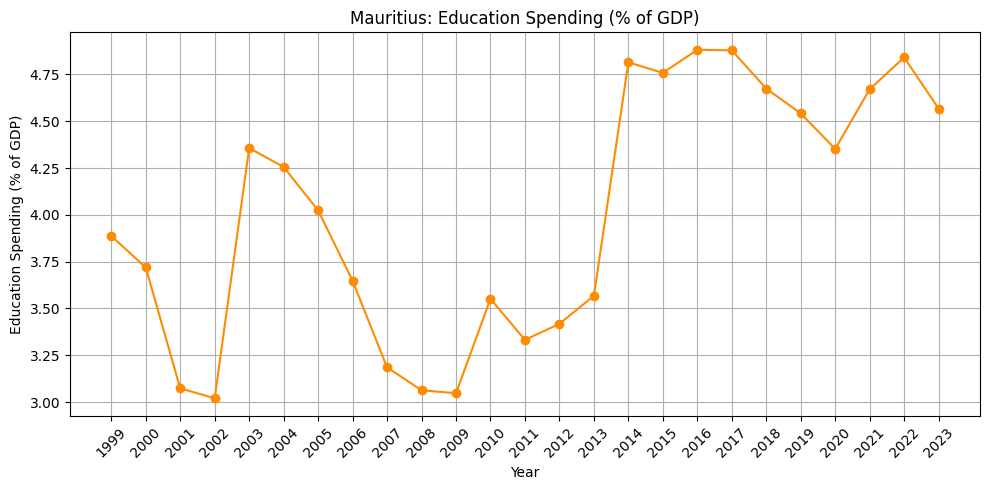

Saved: /content/drive/MyDrive/MBA/Mauritius_Education_Spending_percent_of_GDP.png


In [18]:
fig = plt.figure(figsize=(10, 5))

plt.plot(edu_values.index, edu_values.values, marker='o', color='darkorange')
plt.title('Mauritius: Education Spending (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Education Spending (% of GDP)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Education Spending (% of GDP)",
    fig
)

Mauritius: Education Spending (% of GDP) (1999–2023)

This chart reflects how much of Mauritius’s economic output (GDP) has been allocated to education each year. Public investment in education is a key indicator of long-term development and human capital strategy — especially important for small island economies aiming to transition to service- and knowledge-based sectors.

Key Insights:
- Early Decline (1999–2002):
Spending dropped from 3.9% to just above 3%, possibly reflecting austerity efforts or structural adjustment measures during this period. This may have impacted education outcomes in the early 2000s.
- First Surge and Plateau (2003–2008):
A noticeable recovery brought spending up to over 4.3% in 2003–2004, but this was followed by another gradual decline to ~3.1% in 2008–2009, suggesting inconsistent prioritization.
- Post-2010 Gradual Growth:
From 2010 onwards, spending began climbing again. After a brief dip in 2011, there was a steady ramp-up through 2013.
- Peak Investment (2014–2020):
The government significantly ramped up its education budget to above 4.8% of GDP, maintaining this high level for nearly a decade — an encouraging sign of sustained commitment to educational development.
- Recent Fluctuations (2021–2023):
A slight dip occurred in 2021 (to ~4.3%), likely tied to pandemic fiscal constraints, but spending rebounded by 2022. By 2023, it remains strong at ~4.55% of GDP.

Interpretation:

Mauritius has made notable progress in prioritizing education, particularly since 2013. The increase in spending likely supported curriculum modernization, access to secondary and tertiary education, and ICT in classrooms. Despite brief drops, the trend reflects a strategic shift toward knowledge economy development — crucial for post-tourism diversification and long-term productivity growth.

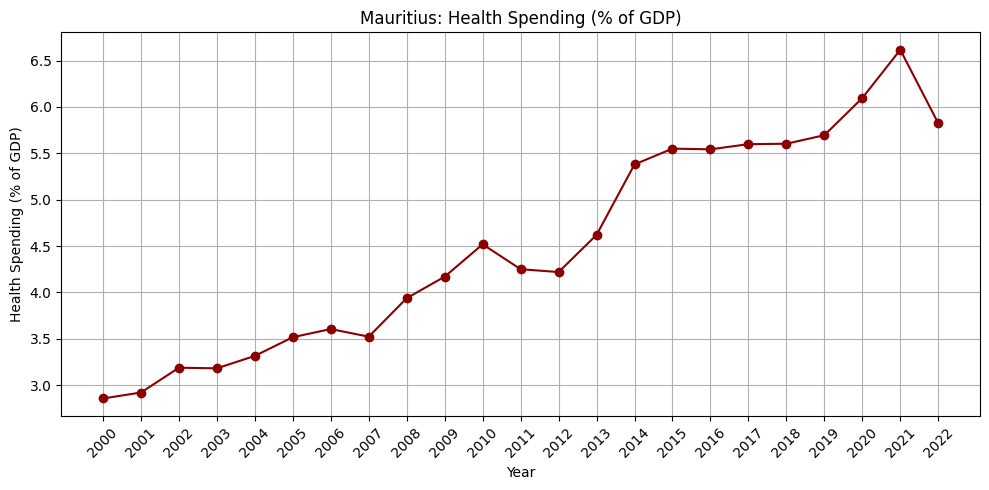

Saved: /content/drive/MyDrive/MBA/Mauritius_Health_Spending_percent_of_GDP.png


In [19]:
fig = plt.figure(figsize=(10, 5))
plt.plot(health_values.index, health_values.values, marker='o', color='darkred')
plt.title('Mauritius: Health Spending (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Health Spending (% of GDP)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Health Spending (% of GDP)",
    fig
)

Mauritius: Health Spending (% of GDP) (2000–2022)

This chart shows the proportion of GDP that Mauritius dedicates to public and private healthcare expenditures annually. Health spending as a share of GDP reflects not only budget priorities, but also demographic changes, disease burden, and the efficiency of health service delivery.


Key Trends:
- Gradual Climb (2000–2010):
From 2.9% in 2000, health spending grew steadily, reaching 4.5% by 2010. This increase suggests a gradual policy shift toward strengthening the health sector and addressing the needs of a growing and aging population.
- Stabilization Phase (2011–2013):
Spending plateaued around 4.2–4.3%, which may reflect cost containment or delays in reform during this period. Still, the level remained historically high.
- Significant Ramp-Up (2014–2019):
From 2014 onward, Mauritius dramatically increased health investments — crossing 5.5% of GDP and reaching ~5.7% by 2019. This period aligns with an emphasis on universal access, health infrastructure modernization, and non-communicable disease (NCD) control.
- Pandemic-Driven Spike (2020–2021):
In response to COVID-19, Mauritius sharply boosted spending to a peak of 6.6% of GDP in 2021 — the highest level in the dataset. This covered vaccine rollouts, emergency response, hospital upgrades, and social health support.
- Post-Pandemic Normalization (2022):
A slight decline to ~5.8% occurred in 2022, indicating a return to more routine expenditure levels, though still above the pre-COVID norm.

Interpretation:

Mauritius has shown strong and consistent commitment to public health investment, especially after 2010. The COVID-19 crisis accelerated health spending even further, highlighting the importance of a resilient health system. Continued high spending post-pandemic suggests a strategic pivot toward sustainable health security and universal coverage.

In [20]:
# https://oec.world/en/profile/country/mus?selector1879id=percentage&selector358id=tradeValue

# Download images and load them here

In [21]:
rd_file = '/content/drive/MyDrive/MBA/API_GB.XPD.RSDV.GD.ZS_DS2_en_excel_v2_19590.xls'
researchers_file = '/content/drive/MyDrive/MBA/API_SP.POP.SCIE.RD.P6_DS2_en_excel_v2_20252.xls'

# Load the "Data" sheets with headers from row 4 (index 3)
rd_df = pd.read_excel(rd_file, sheet_name='Data', header=3)
researchers_df = pd.read_excel(researchers_file, sheet_name='Data', header=3)

# Filter for Mauritius
rd_mu = rd_df[rd_df['Country Name'] == 'Mauritius']
researchers_mu = researchers_df[researchers_df['Country Name'] == 'Mauritius']

# Get year columns
years = [str(y) for y in range(1995, 2025)]

# Extract values
rd_values = rd_mu[years].T.dropna().astype(float)
rd_values.index.name = 'Year'

researcher_values = researchers_mu[years].T.dropna().astype(float)
researcher_values.index.name = 'Year'

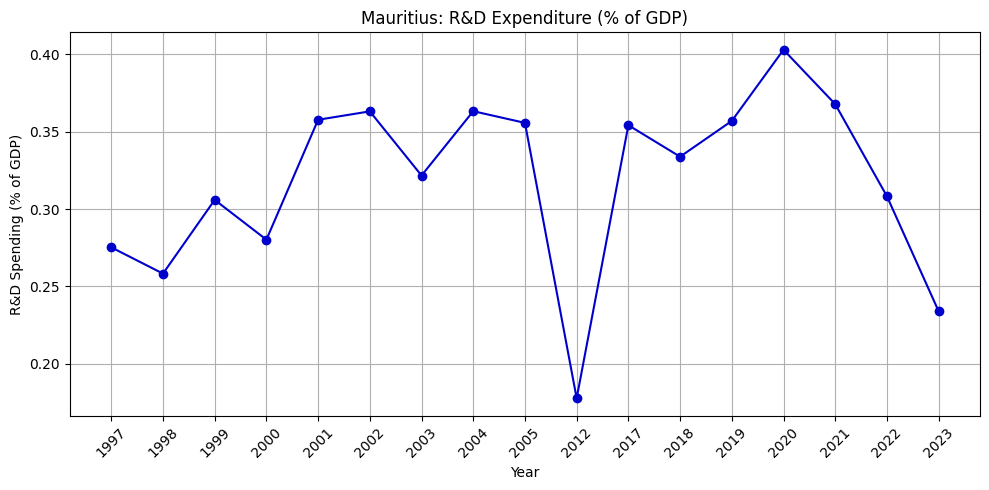

Saved: /content/drive/MyDrive/MBA/Mauritius_R&D_Expenditure_percent_of_GDP.png


In [22]:
# https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS?locations=MU

# Plot R&D spending
fig = plt.figure(figsize=(10, 5))
plt.plot(rd_values.index, rd_values.values, marker='o', color='mediumblue')
plt.title('Mauritius: R&D Expenditure (% of GDP)')
plt.xlabel('Year')
plt.ylabel('R&D Spending (% of GDP)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: R&D Expenditure (% of GDP)",
    fig
)

Mauritius: R&D Expenditure (% of GDP) (1997–2023)

This chart highlights the level of national investment in research and development (R&D) relative to Mauritius’s GDP. R&D spending is a crucial proxy for innovation potential, technological advancement, and the economy’s capacity to move up the value chain.

Key Trends:
- Initial Stability (1997–2000):
R&D spending remained modest, fluctuating between 0.26% and 0.31% of GDP. This indicates some early public and private engagement, though likely centered on traditional sectors.
- Early Growth and Plateau (2001–2006):
The country briefly raised spending to 0.36–0.37%, showing intent to boost innovation capacity. However, these gains were not sustained long-term.
- Sharp Dip (2012):
A striking collapse to 0.18% in 2012 likely reflects fiscal reprioritization or data/reporting gaps. This drop underscores the vulnerability of innovation funding in the face of competing pressures.
- Rebound and Peak (2017–2020):
R&D investments were revived and peaked at 0.40% of GDP in 2020, the highest recorded. This could indicate enhanced support for tech parks, startups, and digital innovation — possibly accelerated by the pandemic’s push toward digital transformation.
- Recent Decline (2021–2023):
Since 2021, spending has gradually declined to 0.23% in 2023, which raises concerns about sustainability of innovation policy.

Interpretation:

Mauritius demonstrates sporadic but promising engagement in R&D, with evidence of intent to grow its innovation economy. However, the lack of consistent investment undermines its long-term competitiveness — especially in high-tech manufacturing, digital services, and green tech. A stable upward trajectory is essential for achieving knowledge economy goals and regional leadership in innovation.


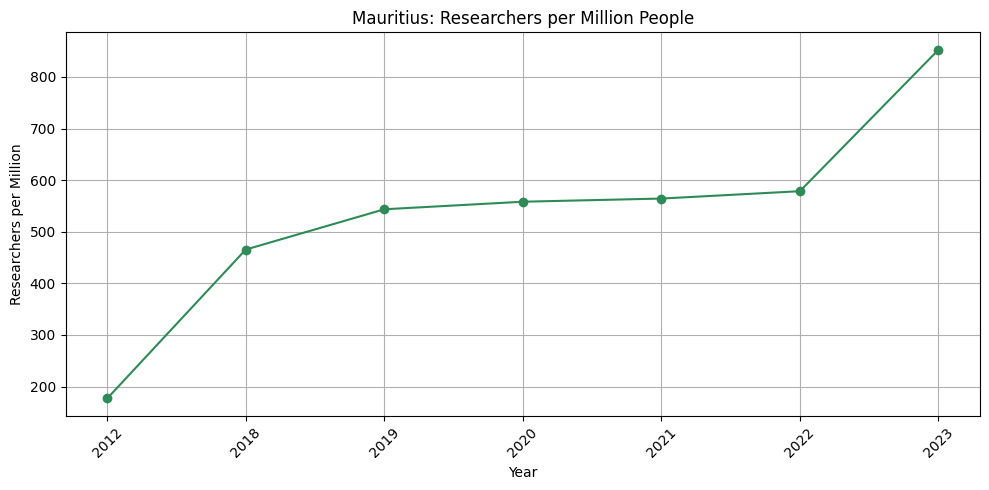

Saved: /content/drive/MyDrive/MBA/Mauritius_Researchers_per_Million_People.png


In [23]:
# https://data.worldbank.org/indicator/SP.POP.SCIE.RD.P6?locations=MU

fig = plt.figure(figsize=(10, 5))
plt.plot(researcher_values.index, researcher_values.values, marker='o', color='seagreen')
plt.title('Mauritius: Researchers per Million People')
plt.xlabel('Year')
plt.ylabel('Researchers per Million')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Researchers per Million People",
    fig
)

Mauritius: Researchers per Million People (2012–2023)

This chart measures the number of researchers engaged in R&D per million inhabitants, serving as a critical indicator of human capital in science, technology, and innovation (STI). It reflects not only educational output but also the capacity of the economy to generate and support research careers.


Key Trends:
- Sharp Growth After 2012:
In 2012, Mauritius had only ~180 researchers per million people, a relatively low base. However, within six years, this number more than doubled to ~470 by 2018, signaling a significant push in research infrastructure, training, and possibly investment in tertiary education.
- Steady Gains (2019–2022):
Growth in the number of researchers slowed but remained positive, rising gradually to ~580 per million in 2022. This suggests consolidation, possibly reflecting the creation of sustainable academic and research roles.
- Breakthrough in 2023:
The most remarkable jump came in 2023, where the number spiked to over 850 researchers per million. This could be attributed to new R&D policies, the emergence of research centers, or a stronger innovation ecosystem, including international collaborations or incentives for returning diaspora talent.

Interpretation:

Mauritius is making remarkable progress in building its research workforce. From a relatively weak position in 2012, the country now rivals upper-middle-income peers in R&D personnel density. This upward trajectory aligns with the country’s broader goals of economic diversification, knowledge-intensive services, and digital transformation.

However, the challenge lies in retaining talent, ensuring institutional support, and translating this growing research base into commercial innovation and social impact.

In [24]:
# https://databank.worldbank.org/source/worldwide-governance-indicators#

wgi_file = '/content/drive/MyDrive/MBA/P_Data_Extract_From_Worldwide_Governance_Indicators.xlsx'
wgi_df = pd.read_excel(wgi_file, sheet_name='Data')

# Clean year columns (e.g., '2023 [YR2023]' → '2023')
wgi_df.columns = [col.split(' ')[0] if '[YR' in col else col for col in wgi_df.columns]

# Reshape to long format
wgi_long = pd.melt(
    wgi_df,
    id_vars=['Country Name', 'Series Name'],
    var_name='Year',
    value_name='Value'
)

# Keep only valid 4-digit year rows
wgi_long = wgi_long[wgi_long['Year'].str.match(r'^\d{4}$')]
wgi_long['Year'] = wgi_long['Year'].astype(int)

# Filter for Mauritius only
wgi_mu = wgi_long[wgi_long['Country Name'] == 'Mauritius']

# Preview available indicators
print(wgi_mu['Series Name'].unique())

['Control of Corruption: Estimate' 'Government Effectiveness: Estimate'
 'Rule of Law: Estimate' 'Voice and Accountability: Estimate']


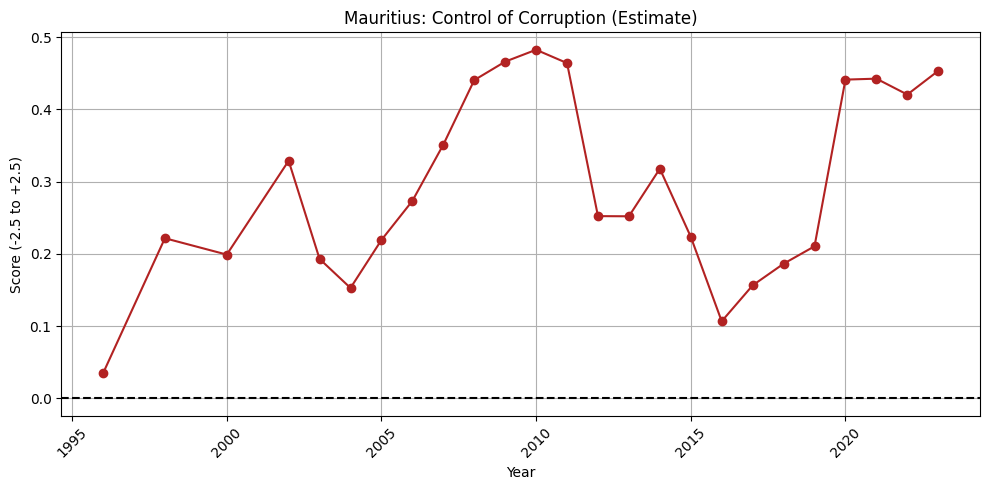

Saved: /content/drive/MyDrive/MBA/Mauritius_Control_of_Corruption_Estimate.png


In [25]:
corruption = wgi_mu[wgi_mu['Series Name'] == 'Control of Corruption: Estimate'].dropna(subset=['Value'])

fig = plt.figure(figsize=(10, 5))
plt.plot(corruption['Year'], corruption['Value'], marker='o', color='firebrick')
plt.title('Mauritius: Control of Corruption (Estimate)')
plt.ylabel('Score (-2.5 to +2.5)')
plt.xlabel('Year')
plt.grid(True)
plt.axhline(0, linestyle='--', color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Control of Corruption (Estimate)",
    fig
)

Mauritius: Control of Corruption – Worldwide Governance Indicator

This graph displays Mauritius’s Control of Corruption score from the World Bank’s Worldwide Governance Indicators (WGI). The scores range from -2.5 (worst) to +2.5 (best) and reflect perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption.


Key Trends:
- Stable and Positive Governance (1996–2011):
Mauritius consistently maintained positive scores throughout the period, indicating moderate to strong institutional resistance to corruption. The country saw steady improvement from the early 2000s, peaking around 2010 at ~0.48, reflecting strong control and reforms during that time.
- Dip Around 2012–2016:
A noticeable decline in corruption control is observed between 2012 and 2016, dropping to ~0.11 in 2016. This suggests increased governance challenges or public perception of weakening anti-corruption efforts, potentially linked to political transitions or high-profile scandals.
- Recovery and Renewed Confidence (2017–2023):
The index rebounded from 2017 onwards, with a marked jump in 2020, sustaining above 0.4 through to 2023. This could reflect renewed anti-corruption initiatives, stronger legal enforcement, or improved transparency mechanisms.


Interpretation:

Mauritius continues to outperform many of its regional and economic peers in terms of corruption control. While challenges exist, especially during politically turbulent years, the recent positive trajectory signals institutional resilience and renewed commitment to governance reforms.

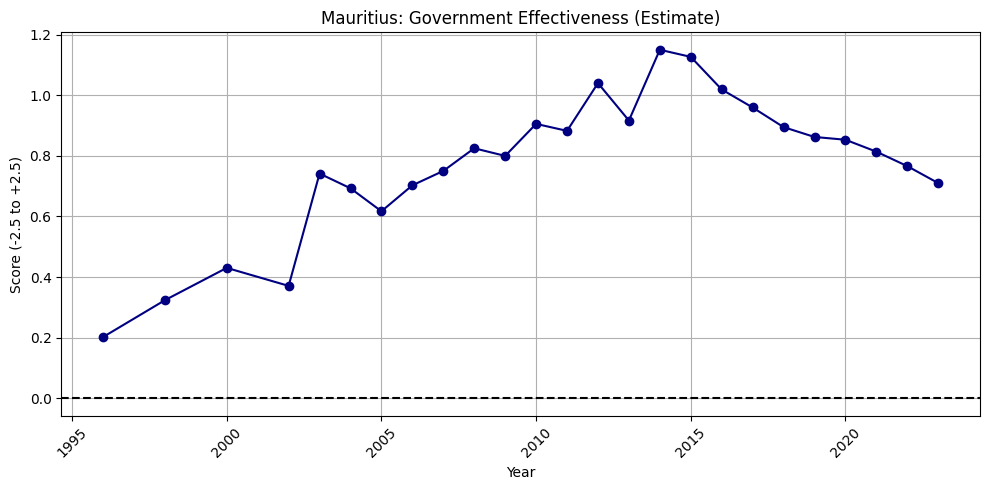

Saved: /content/drive/MyDrive/MBA/Mauritius_Government_Effectiveness_Estimate.png


In [26]:
effectiveness = wgi_mu[wgi_mu['Series Name'] == 'Government Effectiveness: Estimate'].dropna(subset=['Value'])

fig = plt.figure(figsize=(10, 5))
plt.plot(effectiveness['Year'], effectiveness['Value'], marker='o', color='navy')
plt.title('Mauritius: Government Effectiveness (Estimate)')
plt.ylabel('Score (-2.5 to +2.5)')
plt.xlabel('Year')
plt.grid(True)
plt.axhline(0, linestyle='--', color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Government Effectiveness (Estimate)",
    fig
)

Mauritius: Government Effectiveness – WGI Index

This chart visualizes Mauritius’s Government Effectiveness score from the World Bank’s Worldwide Governance Indicators (WGI) dataset, ranging from -2.5 (weakest) to +2.5 (strongest). This metric reflects perceptions of the quality of public services, the capacity of the civil service, independence from political pressures, and the credibility of policy implementation.

Observed Trends:
- 1996–2003: Gradual Strengthening
Mauritius began with a modest score of around 0.2, reflecting a developing public administration. Over the next few years, the country steadily improved, reaching 0.75 by 2003, signaling stronger institutional performance and better service delivery.
- 2004–2010: Institutional Consolidation
The mid-2000s show a solidified upward trend, with Mauritius entering a high-performing phase. The score fluctuated between 0.75 and 0.9, reflecting stable bureaucratic capacity and effective governance mechanisms.
- 2011–2015: Peak Performance
The effectiveness rating peaked around 2014–2015 at nearly 1.15, the highest in the series, marking exemplary policy execution and service delivery standards during this period.
- 2016–2023: Gradual Decline but Still High
Post-2015, a slow but noticeable decline in government effectiveness is observed, ending around 0.7 by 2023. While still relatively high, this drop could indicate rising implementation gaps, political interference, or reduced policy efficiency.

Interpretation:

Mauritius has demonstrated a strong tradition of public sector performance, particularly in the early 2010s. While more recent years show signs of strain, the country maintains above-average governance capacity compared to regional peers. The declining trend warrants attention to ensure institutional integrity and policy effectiveness remain intact.

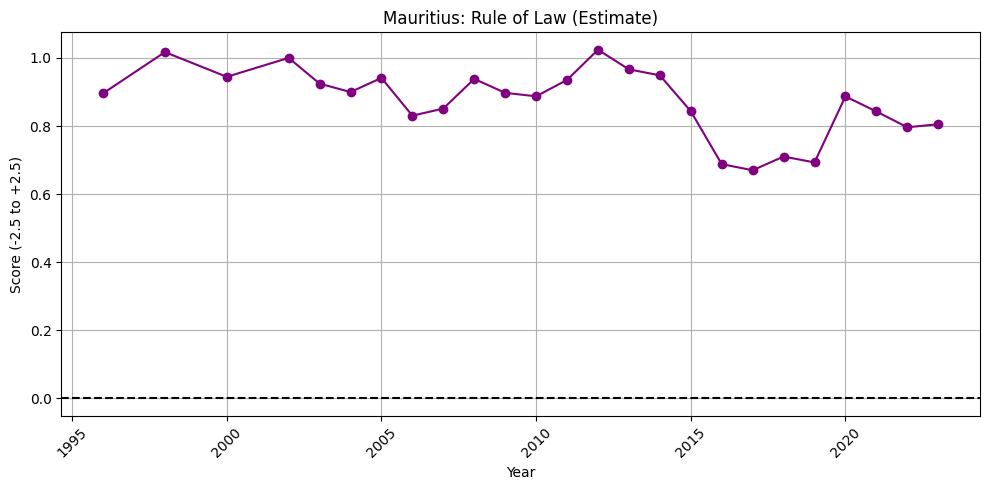

Saved: /content/drive/MyDrive/MBA/Mauritius_Rule_of_Law_Estimate.png


In [27]:
rule_law = wgi_mu[wgi_mu['Series Name'] == 'Rule of Law: Estimate'].dropna(subset=['Value'])

fig = plt.figure(figsize=(10, 5))
plt.plot(rule_law['Year'], rule_law['Value'], marker='o', color='purple')
plt.title('Mauritius: Rule of Law (Estimate)')
plt.ylabel('Score (-2.5 to +2.5)')
plt.xlabel('Year')
plt.grid(True)
plt.axhline(0, linestyle='--', color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Rule of Law (Estimate)",
    fig
)

Mauritius: Rule of Law – WGI Indicator

This graph depicts the Rule of Law estimate for Mauritius, based on the World Bank’s Worldwide Governance Indicators. The score ranges from -2.5 (weak rule of law) to +2.5 (strong rule of law) and reflects:
- Confidence in the judicial system
- Property rights
- Contract enforcement
- Reliability of law enforcement

Observed Trends:
- 1996–2011: High and Stable Confidence
Mauritius maintained consistently high rule of law scores, averaging between 0.9 and 1.0, indicating a solid legal system and strong institutional trust. The early 2000s were particularly strong, peaking around 1.02 in 2000.
- 2012–2016: Notable Decline
A visible decline begins around 2012, reaching a low of approximately 0.67 by 2016. This could suggest concerns such as judicial inefficiency, high-profile cases, or governance challenges during that period.
- 2017–2023: Partial Recovery and Plateau
Although there was some recovery in 2019 (up to ~0.89), the indicator stabilized just below 0.85 by 2023. This suggests persistent but slightly weakened legal and institutional capacity compared to earlier decades.

Interpretation:

Mauritius has long been recognized for its relatively strong legal framework and reliable rule of law. While the country continues to perform well by regional and global standards, the post-2010 decline and flattening highlight the importance of reinforcing judicial independence, transparency, and property protections to avoid erosion in governance quality.


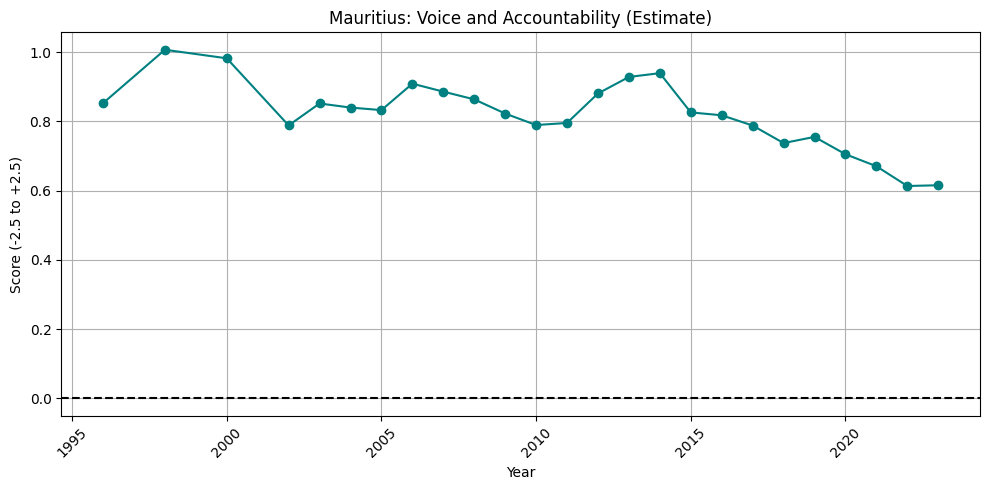

Saved: /content/drive/MyDrive/MBA/Mauritius_Voice_and_Accountability_Estimate.png


In [28]:
voice = wgi_mu[wgi_mu['Series Name'] == 'Voice and Accountability: Estimate'].dropna(subset=['Value'])

fig = plt.figure(figsize=(10, 5))
plt.plot(voice['Year'], voice['Value'], marker='o', color='teal')
plt.title('Mauritius: Voice and Accountability (Estimate)')
plt.ylabel('Score (-2.5 to +2.5)')
plt.xlabel('Year')
plt.grid(True)
plt.axhline(0, linestyle='--', color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Voice and Accountability (Estimate)",
    fig
)

Mauritius: Voice and Accountability (1996–2023)

This chart represents the Voice and Accountability indicator from the World Bank’s Worldwide Governance Indicators (WGI). The score, which ranges from -2.5 (weak) to +2.5 (strong), reflects:
- Freedom of expression
- Media independence
- Political participation
- Citizens’ ability to elect their government

Trend Overview:
- 1996–2000: Rapid Improvement and Peak
Mauritius started strong, quickly climbing to above 1.0 by 1999, indicating a high level of democratic engagement and civil liberties early on.
- 2001–2014: Relative Stability with Minor Dips
Throughout this period, the country maintained relatively high scores between 0.8 and 1.0, suggesting ongoing political openness, albeit with some small fluctuations.
- 2015–2023: Noticeable Decline
Starting around 2015, the indicator entered a downward trend, declining to around 0.61 by 2023. This may reflect concerns such as:
- Increasing restrictions on media
- Reduced civic space
- Public dissatisfaction with democratic processes or trust in institutions

Interpretation:

While Mauritius has historically demonstrated strong democratic fundamentals, the post-2015 decline in Voice and Accountability signals an area of concern. Continued attention is needed to protect civil liberties, encourage political engagement, and foster independent institutions that empower citizens.


In [29]:
# https://ourworldindata.org/co2-and-greenhouse-gas-emissions

co2_file = '/content/drive/MyDrive/MBA/per-capita-co-emissions.csv'
co2_df = pd.read_csv(co2_file)

# Show column names
print("Columns:", co2_df.columns.tolist())

# Filter for Mauritius (correct column is 'Entity')
co2_mu = co2_df[co2_df['Entity'] == 'Mauritius']
co2_mu.head()

Columns: ['Entity', 'Year', 'Annual CO₂ emissions (per capita)']


,Entity,Year,Annual CO₂ emissions (per capita)
15062,Mauritius,1950,0.383468
15063,Mauritius,1951,0.257302
15064,Mauritius,1952,0.315660
15065,Mauritius,1953,0.326760
15066,Mauritius,1954,0.319185


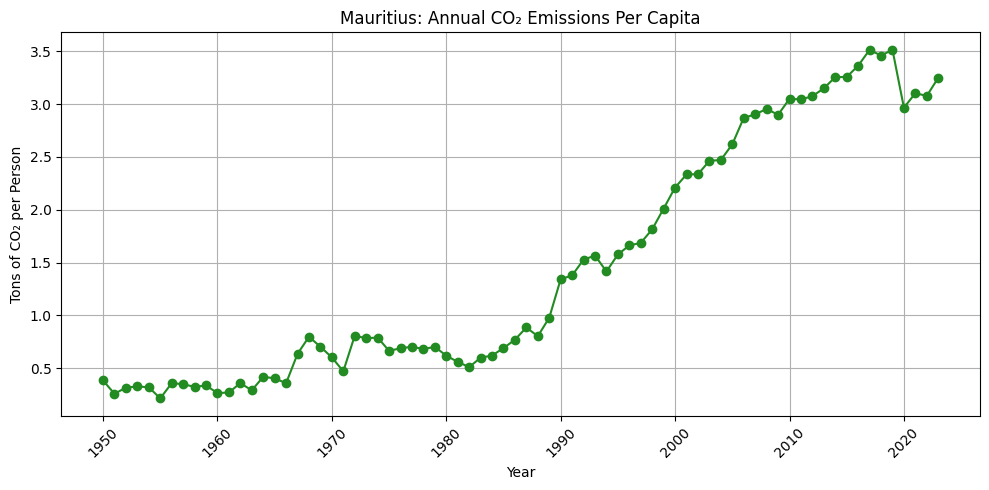

Saved: /content/drive/MyDrive/MBA/Mauritius_Annual_CO₂_Emissions_Per_Capita.png


In [30]:
# Drop missing values (just in case)
co2_mu = co2_mu.dropna(subset=['Annual CO₂ emissions (per capita)'])

# Plot
fig = plt.figure(figsize=(10, 5))
plt.plot(co2_mu['Year'], co2_mu['Annual CO₂ emissions (per capita)'], marker='o', color='forestgreen')
plt.title('Mauritius: Annual CO₂ Emissions Per Capita')
plt.xlabel('Year')
plt.ylabel('Tons of CO₂ per Person')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Annual CO₂ Emissions Per Capita",
    fig
)

Mauritius: CO₂ Emissions Per Capita (1949–2023)

This chart tracks the annual carbon dioxide (CO₂) emissions per person in Mauritius, measured in metric tons per capita.

Trend Breakdown:
- 1949–1980: Stable, Low Emissions
During this period, emissions fluctuated below 1 ton per capita, reflecting a relatively small industrial footprint and limited fossil fuel dependence.
- 1980s–Early 2000s: Steady Growth Phase
From the mid-1980s onward, emissions began rising consistently, reaching around 2.5 tons per capita by the early 2000s. This aligns with:
- Economic modernization
- Growing vehicle use
- Expansion of the energy sector and industry
- 2000s–2019: Peak Carbon Intensity
Mauritius peaked at approximately 3.5 tons per capita by 2018–2019. This marks a period of maximum carbon intensity, indicating:
- High fossil fuel usage
- Limited renewable energy penetration
- Increased consumerism and industrial output
- 2020–2021: Sudden Drop
The noticeable decline in 2020 likely reflects the impact of COVID-19, with reduced travel, production, and overall economic activity.
- 2022–2023: Partial Recovery
A modest rebound suggests economic recovery resumed, but with carbon emissions remaining below pre-pandemic peak levels.

Interpretation:

Mauritius has seen a long-term rise in carbon emissions per capita—reflecting industrial and economic growth—but remains moderate globally.
The pandemic-induced dip highlights the economic–environmental linkage, and the post-2020 period presents a key opportunity for decarbonization strategies, such as:
- Investing in clean energy
- Promoting electric mobility
- Implementing sustainable urban planning


In [31]:
# https://data.worldbank.org/indicator/SI.POV.GINI?locations=MU

gini_file = '/content/drive/MyDrive/MBA/API_SI.POV.GINI_DS2_en_excel_v2_19511.xls'

# Load data (header starts on row 3, index 2)
gini_df = pd.read_excel(gini_file, sheet_name='Data', header=3)

# Filter for Mauritius
gini_mu = gini_df[gini_df['Country Name'] == 'Mauritius']

# Automatically detect year columns (those that are digits)
year_cols = [col for col in gini_mu.columns if str(col).isdigit()]

# Extract & clean values
gini_values = gini_mu[year_cols].T.dropna().astype(float)
gini_values.index.name = 'Year'

# Preview
gini_values.head()

,167
Year,
2006,35.7
2012,38.5
2017,36.8


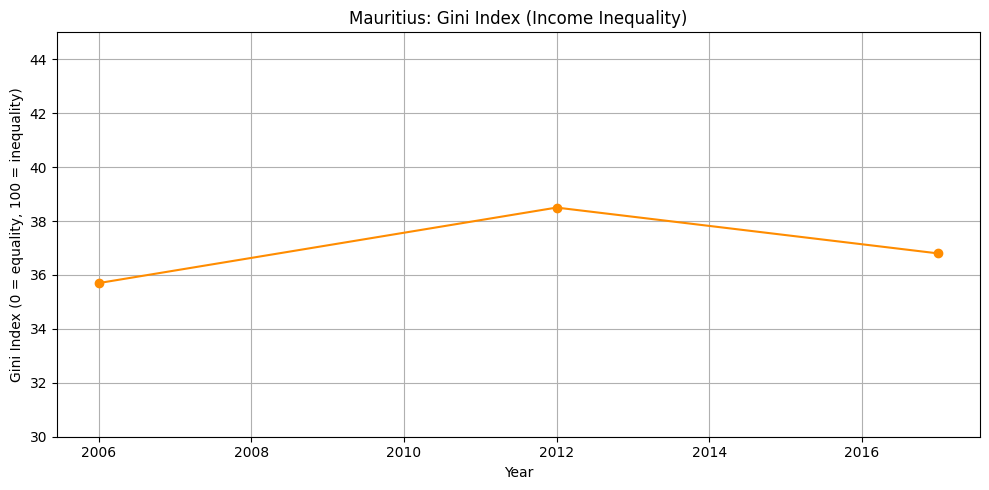

Saved: /content/drive/MyDrive/MBA/Mauritius_Gini_Index_Income_Inequality.png


In [32]:
gini_values = gini_values.reset_index()
gini_values.columns = ['Year', 'Gini Index']
gini_values['Year'] = gini_values['Year'].astype(int)

# Plot
fig = plt.figure(figsize=(10, 5))
plt.plot(gini_values['Year'], gini_values['Gini Index'], marker='o', linestyle='-', color='darkorange')
plt.title('Mauritius: Gini Index (Income Inequality)')
plt.xlabel('Year')
plt.ylabel('Gini Index (0 = equality, 100 = inequality)')
plt.ylim(30, 45)
plt.grid(True)
plt.tight_layout()
plt.show()

save_plot(
    "Mauritius: Gini Index (Income Inequality)",
    fig
)

Mauritius: Gini Index (2006–2017)

The Gini Index is a key measure of income inequality, where:
- 0 indicates perfect equality (everyone earns the same)
- 100 indicates perfect inequality (one person has all the income)


Key Insights from the Data:
- 2006 ~35.7
- 2012 ~38.5
- 2017 ~36.8

Trend Analysis:
- 2006–2012: Rising Inequality
Income inequality increased, peaking in 2012 at 38.5, reflecting growing disparities during that period. This could be linked to:
- A shift toward capital-intensive or higher-skill industries
- A widening gap between formal and informal sector wages
- 2012–2017: Slight Improvement
The Gini Index declined to 36.8, suggesting modest gains in income equality, potentially due to:
- Social protection programs
- Expanded access to education and health services
- Job creation in more inclusive sectors

Interpretation:

Mauritius has maintained a relatively moderate level of income inequality by global standards, though the mid-2000s to early 2010s saw rising disparity.
Continued efforts toward inclusive growth, skills development, and targeted redistribution are key to flattening the inequality curve.
